## Imports

In [1]:
import re
import os
import subprocess

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from vis import *

## Utils

In [2]:
def parse_performance_data(text):
    pattern = re.compile(
        r"Algorithm:\s*(?P<Algorithm>\S+)\s*"
        r"Instance:\s*(?P<Instance>\S+)\s*"
        r"Initial Score:\s*(?P<Initial_Score>\d+)\s*"
        r"Score:\s*(?P<Score>\d+)\s*"
        r"Number\s*of\s*Evaluations:\s*(?P<Number_of_Evaluations>\d+)\s*"
        r"Number\s*of\s*Performed\s*Moves:\s*(?P<Number_of_Performed_Moves>\d+)\s*"
        r"Number\s*of\s*Best\s*Solution\s*Updates:\s*(?P<Number_of_Best_Solution_Updates>\d+)\s*"
        r"Solution:\s*(?P<Solution>[\d\s]+)\s*"
        r"Optimal\s*Score:\s*(?P<Optimal_Score>\d+)\s*"
        r"Optimal\s*Solution:\s*(?P<Optimal_Solution>[\d\s]+)"
    )
    
    rows = []
    for match in pattern.finditer(text):
        row = match.groupdict()
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    numerical_cols = ['Initial_Score', 'Score', 'Number_of_Evaluations', 'Number_of_Performed_Moves', 'Number_of_Best_Solution_Updates', 'Optimal_Score']
    df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)
    
    return df

def parse_runtime_data(text):
    pattern = re.compile(
        r"Algorithm:\s*(?P<Algorithm>\S+)\s*"
        r"Instance:\s*(?P<Instance>\S+)\s*"
        r"Runtime:\s*(?P<Runtime>\S+)\s*"
    )
    
    rows = []
    for match in pattern.finditer(text):
        row = match.groupdict()
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    numerical_cols = ['Runtime']
    df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)
    
    return df

## Define variables
### Optional - run scripts from python

In [3]:
performance_file = 'results/performance_results.txt'
runtime_file = 'results/runtime_results.txt'
performance_file_300 = 'results/performance_results_300.txt'

num_restarts = [20, 50, 100, 150, 200, 300, 500]
restarts_files_path = "results/MSLS_tests/"

selected_instances = ["chr22a", "tai60a"]

In [4]:
# Names of instances ordered by instance size
instance_names_ordered = ["wil100", "lipa80a", "tai60a", "kra30a", "bur26a", "bur26b", "chr22a", "chr20c", "had14"][::-1]

RANDOMRUNTIMES = {'bur26a': 3123592.0,
                'bur26b': 2541337.0,
                'chr20c': 647929.9,
                'chr22a': 667595.9,
                'had14': 206135.0,
                'kra30a': 2795186.0,
                'lipa80a': 86358480.0,
                'tai60a': 29373680.0,
                'wil100': 1075083000.0}

algorithm_colors = {
    "greedyLS": "#e41a1c",
    "steepestLS": "#377eb8",
    "heuristic": "#4daf4a",
    "antiheuristic": "#a65628",
    "random": "#ff7f00",
    "randomwalk": "#fdb462",
    "randomsearch": "#984ea3",
    "iterativeImprovement": "#999999"
}

In [5]:
# run_bio_alg("data/qap/", "runtime_results.txt", "performance_results.txt", "both", instance_names_ordered, RANDOMRUNTIME)

## Read Data

In [6]:
with open(runtime_file, 'r') as file:
    data = file.read()

df_runtime = parse_runtime_data(data)

In [7]:
df_runtime.head()

,Algorithm,Instance,Runtime
0,heuristic,wil100,75123.0
1,heuristic,wil100,61964.0
2,heuristic,wil100,49703.0
3,heuristic,wil100,74242.0
4,heuristic,wil100,42885.0


In [8]:
# RANDOMRUNTIMES = {}
# for i, row in df_runtime[df_runtime.Algorithm == "greedyLS"].groupby(["Algorithm", "Instance"])["Runtime"].agg(["mean", "std"]).reset_index().iterrows():
#     RANDOMRUNTIMES[row.Instance] = row[2]
# RANDOMRUNTIMES

In [9]:
with open(performance_file, 'r') as file:
    data = file.read()

df_performance = parse_performance_data(data)
df_performance.Algorithm = df_performance.Algorithm.apply(lambda x: x[1:] if (x.endswith("LS") or x.endswith("Improvement")) else x)

In [10]:
df_performance.tail()

,Algorithm,Instance,Initial_Score,Score,Number_of_Evaluations,Number_of_Performed_Moves,Number_of_Best_Solution_Updates,Solution,Optimal_Score,Optimal_Solution
6295,randomsearch,had14,0,2902,196,196,1,7 0 4 2 5 1 11 10 6 9 13 12 3 8 \t,2724,8 13 10 5 12 11 2 14 3 6 7 1 9 4 \n
6296,randomsearch,had14,0,2944,207,207,4,0 6 5 3 4 10 13 11 8 7 2 9 12 1 \t,2724,8 13 10 5 12 11 2 14 3 6 7 1 9 4 \n
6297,randomsearch,had14,0,2960,161,161,3,6 10 11 1 5 12 2 13 9 4 8 0 7 3 \t,2724,8 13 10 5 12 11 2 14 3 6 7 1 9 4 \n
6298,randomsearch,had14,0,2942,225,225,6,3 5 0 13 10 11 9 12 8 6 1 2 4 7 \t,2724,8 13 10 5 12 11 2 14 3 6 7 1 9 4 \n
6299,randomsearch,had14,0,2988,225,225,5,13 2 5 9 12 1 11 4 8 6 10 0 3 7 \t,2724,8 13 10 5 12 11 2 14 3 6 7 1 9 4 \n


# Analysis

### Problem Description
#### 8 Selected instances:

Selected with the intent of checking various sized instances with some repetitions of instance class to verify consistency
***"wil100", "lipa80a", "lipa80b", "tai60a", "kra30a", "bur26a", "bur26b", "chr22a", "had14"***

#### Neighborhood used: pair swap
#### Neighborhood size: n(n-1)/2 

## Runtime

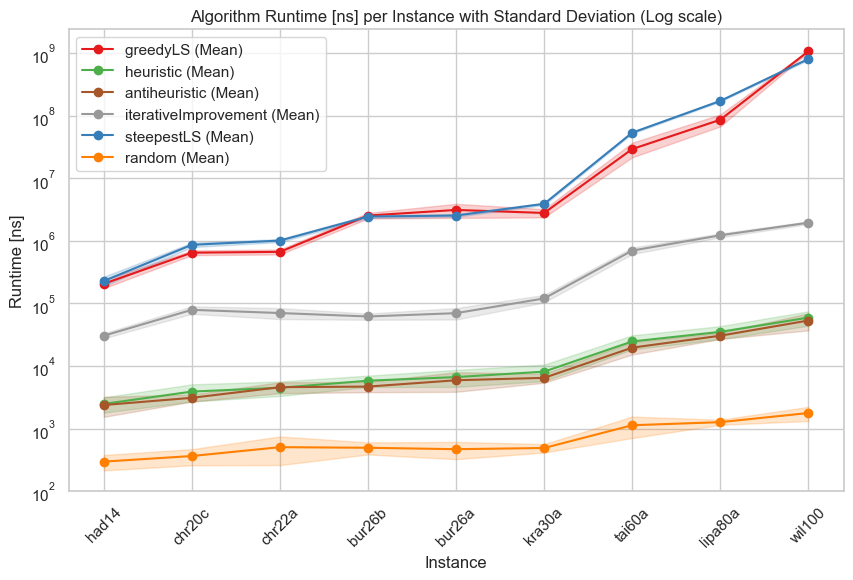

In [11]:
summary = df_runtime.groupby(["Algorithm", "Instance"])["Runtime"].agg(["mean", "std"]).reset_index()
summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
summary = summary.sort_values("Instance")
plot_algorithms("Algrotihms_Runtime_Log.pdf", summary, title="Runtime [ns]", log_scale=True)

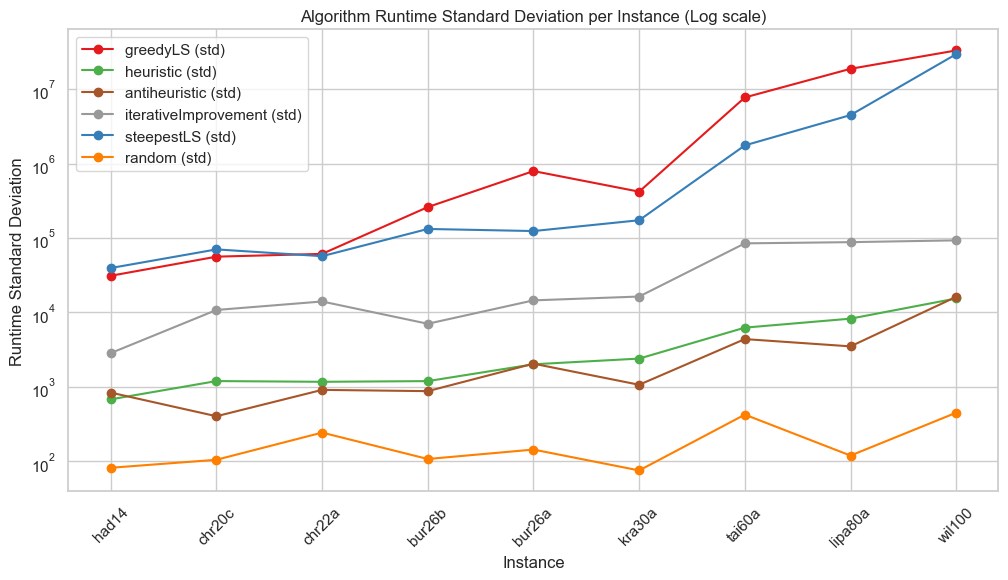

In [12]:
plot_std_line("Algorithm_Runtime_Standard_Deviation.pdf", summary, title="Runtime Standard Deviation", log_scale=True)

In [13]:
# ls_algorithms = summary[summary["Algorithm"].str.contains("LS")]
# plot_algorithms(ls_algorithms, title="Runtime [ns]")

In [14]:
# non_ls_algorithms = summary[~summary["Algorithm"].str.contains("LS")]
# plot_algorithms(non_ls_algorithms, title="Runtime [ns]")

## Quality

In [15]:
df_performance["Solution_Quality"] = (df_performance["Score"] - df_performance["Optimal_Score"]) / df_performance["Optimal_Score"] * 100

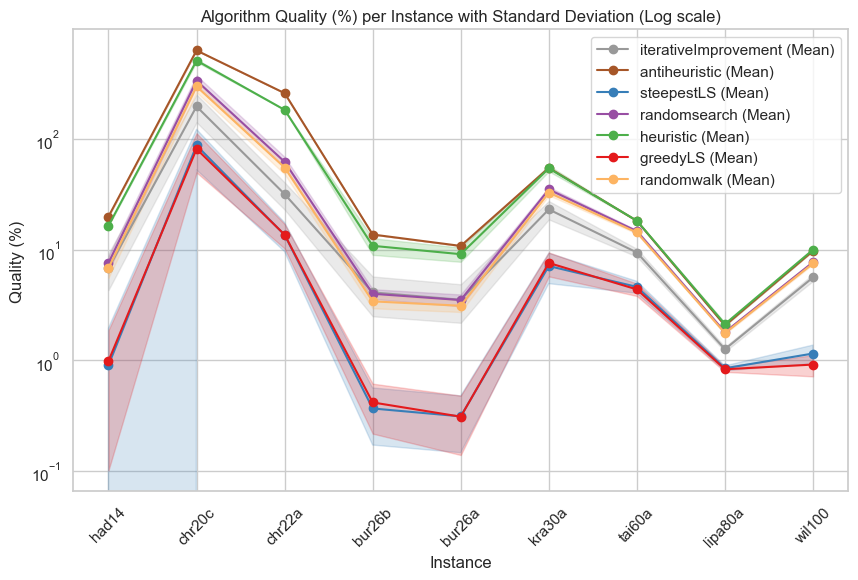

In [16]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Solution_Quality"].agg(["mean", "std"]).reset_index()
summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
# summary = summary[summary.Instance != "chr22a"]
summary = summary.sort_values("Instance")
plot_algorithms("Algorithm_Quality_log.pdf", summary, title="Quality (%)", log_scale=True)

In [17]:
df_performance[df_performance["Algorithm"] == "steepestLS"].groupby(["Instance", "Optimal_Score"])["Score"].agg(min)

Instance  Optimal_Score
bur26a    5426670          5427110
bur26b    3817852          3817852
chr20c    14142              15770
chr22a    6156                6438
had14     2724                2724
kra30a    88900              90620
lipa80a   253195            255033
tai60a    7208572          7457456
wil100    273038            274816
Name: Score, dtype: int64

Note: steepest achieves global optimum for had14

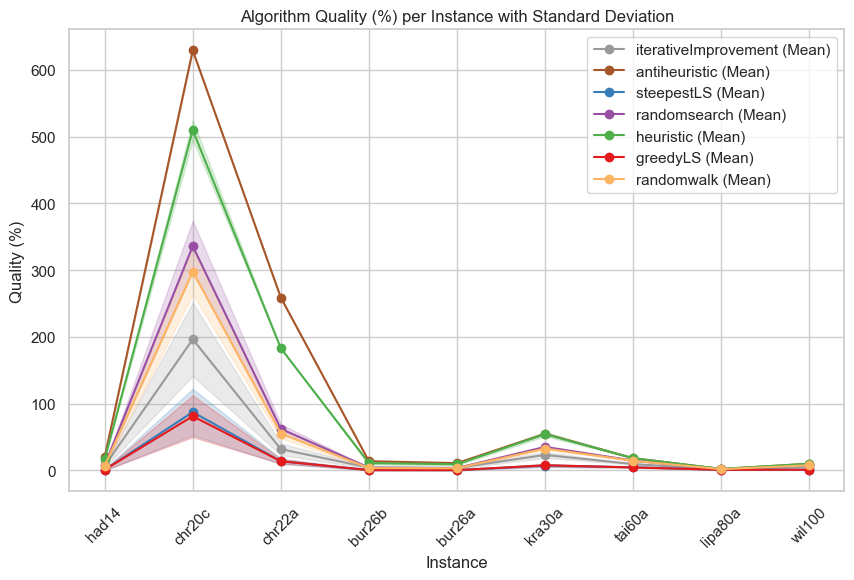

In [18]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Solution_Quality"].agg(["mean", "std"]).reset_index()
summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
# summary = summary[~summary.Instance.str.startswith("chr")]
summary = summary.sort_values("Instance")
plot_algorithms("Algorithm_Quality.pdf", summary, title="Quality (%)", log_scale=False)

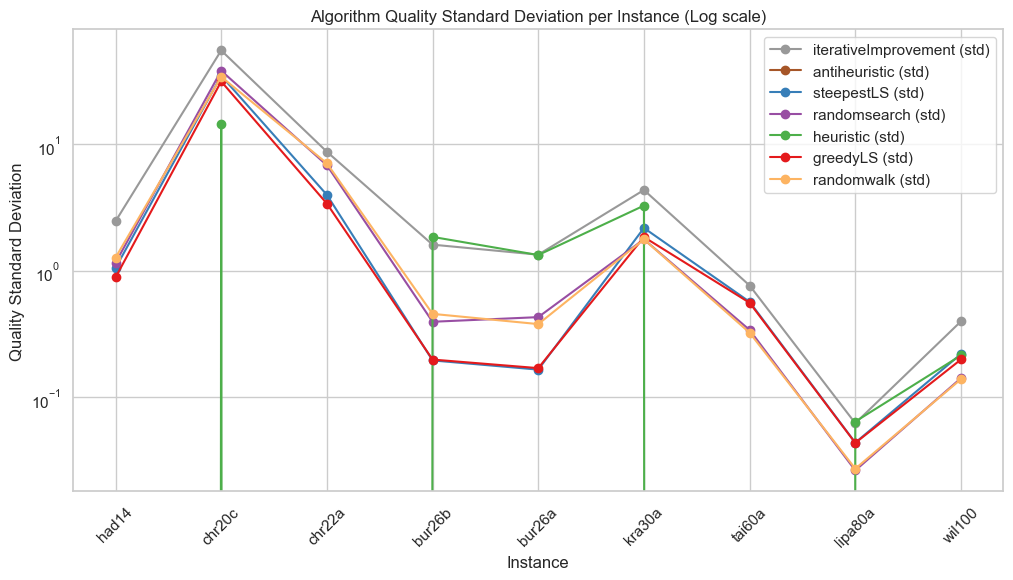

In [19]:
plot_std_line("Algorithm_Quality_Standard_Deviation.pdf", summary, title="Quality Standard Deviation", log_scale=True)

## Efficiency

In [20]:
df_runtime_summary = df_runtime.groupby(["Algorithm", "Instance"]).agg(
    mean_runtime=("Runtime", "mean"),
    std_runtime=("Runtime", "std")
).reset_index()

df_combined = df_performance.merge(df_runtime_summary, on=["Algorithm", "Instance"], how="left")

df_combined["Solution_Quality"] = (df_combined["Score"] - df_combined["Optimal_Score"]) / df_combined["Optimal_Score"] * 100

df_combined.loc[df_combined["Algorithm"].isin(["randomwalk", "randomsearch"]), "mean_runtime"] = df_combined["Instance"].map(RANDOMRUNTIMES)
df_combined.loc[df_combined["Algorithm"].isin(["randomwalk", "randomsearch"]), "std_runtime"] = 0.0

df_combined.head()

,Algorithm,Instance,Initial_Score,Score,Number_of_Evaluations,Number_of_Performed_Moves,Number_of_Best_Solution_Updates,Solution,Optimal_Score,Optimal_Solution,Solution_Quality,mean_runtime,std_runtime
0,heuristic,wil100,0,300960,1,1,1,98 73 58 17 43 39 49 82 97 29 76 57 35 96 99 9...,273038,15 28 100 64 95 88 32 87 30 50 9 10 43 56 78 7...,10.226415,59366.7,15414.268261
1,heuristic,wil100,0,299788,1,1,1,1 73 22 17 43 39 5 82 97 29 76 57 35 96 99 94 ...,273038,15 28 100 64 95 88 32 87 30 50 9 10 43 56 78 7...,9.797171,59366.7,15414.268261
2,heuristic,wil100,0,300900,1,1,1,98 73 58 82 43 39 49 17 97 29 76 57 35 96 99 9...,273038,15 28 100 64 95 88 32 87 30 50 9 10 43 56 78 7...,10.204440,59366.7,15414.268261
3,heuristic,wil100,0,301644,1,1,1,98 73 58 17 43 39 5 82 97 29 76 57 35 96 99 94...,273038,15 28 100 64 95 88 32 87 30 50 9 10 43 56 78 7...,10.476930,59366.7,15414.268261
4,heuristic,wil100,0,299436,1,1,1,1 73 22 82 43 39 5 17 97 29 76 57 35 96 99 94 ...,273038,15 28 100 64 95 88 32 87 30 50 9 10 43 56 78 7...,9.668251,59366.7,15414.268261


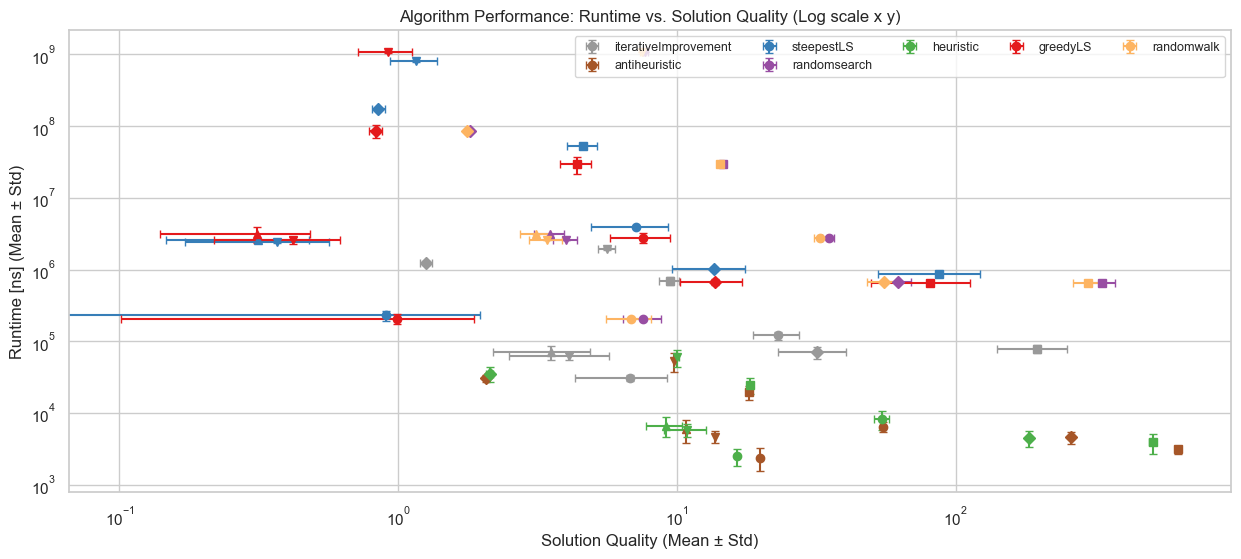

In [21]:
summary = df_combined.groupby(["Algorithm", "Instance"]).agg(
    mean_runtime=("mean_runtime", "mean"),
    std_runtime=("std_runtime", "mean"),
    mean_quality=("Solution_Quality", "mean"),
    std_quality=("Solution_Quality", "std")
).reset_index()

summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
summary = summary.sort_values("Instance")

non_ls_algorithms = summary[~summary["Algorithm"].str.contains("LS|random")]
ls_algorithms = summary[summary["Algorithm"].str.contains("LS|random")]

plot_efficiency("Runtime_Quality.pdf", summary, show_instances=False, log_scale_x=True, log_scale_y=True)
# plot_efficiency(non_ls_algorithms, show_instances=False, log_scale_x=True, log_scale_y=True)
# plot_efficiency(ls_algorithms, show_instances=False, log_scale_x=True, log_scale_y=True)

## Number of Moves/Evaluations/Best Solution Updates

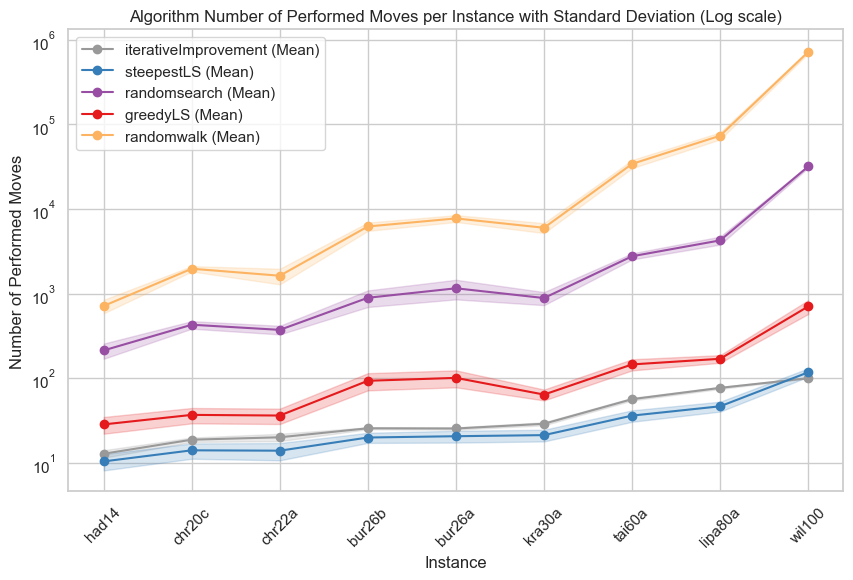

In [22]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Number_of_Performed_Moves"].agg(["mean", "std"]).reset_index()

summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
summary = summary.sort_values("Instance")

summary = summary[~summary["Algorithm"].str.contains("heuristic")]
plot_algorithms("Performed_Moves.pdf", summary, title="Number of Performed Moves", log_scale=True)

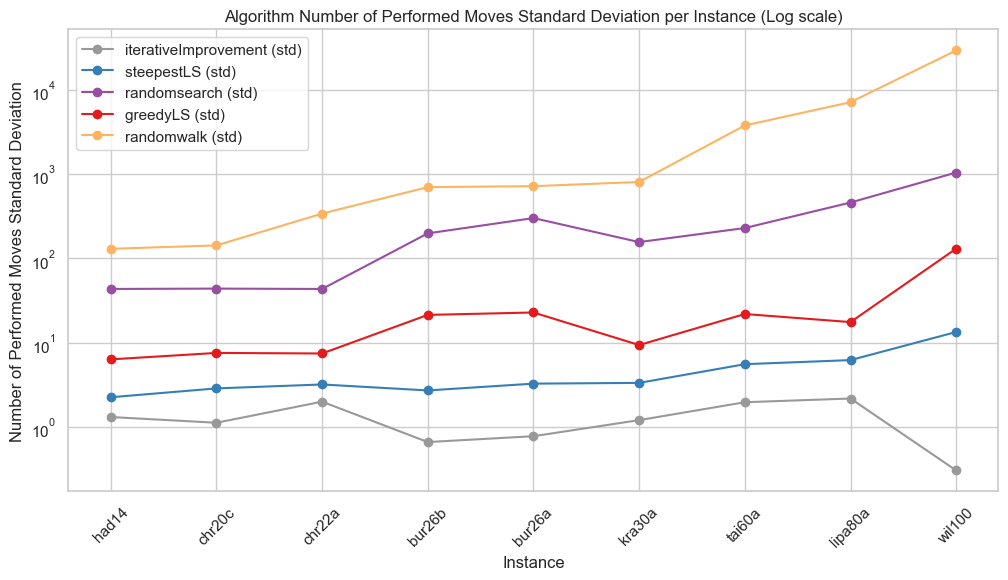

In [23]:
plot_std_line("Number_Moves_Std.pdf", summary, title="Number of Performed Moves Standard Deviation", log_scale=True)

In [24]:
# ls_algorithms = summary[summary["Algorithm"].str.contains("LS")]
# plot_algorithms(ls_algorithms, title="Number of Performed Moves")

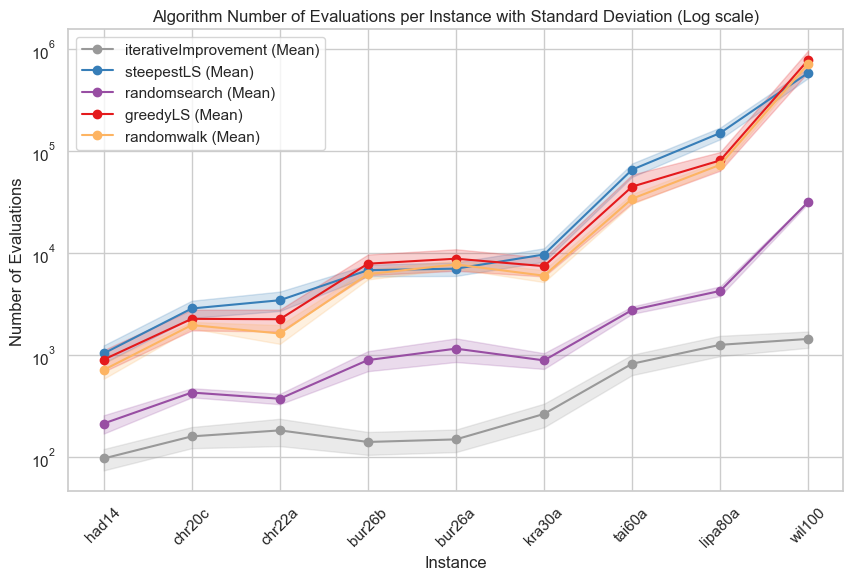

In [25]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Number_of_Evaluations"].agg(["mean", "std"]).reset_index()

summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
summary = summary.sort_values("Instance")

summary = summary[~summary["Algorithm"].str.contains("heuristic")]
plot_algorithms("Num_Evaluations_Log.pdf", summary, title="Number of Evaluations", log_scale=True)

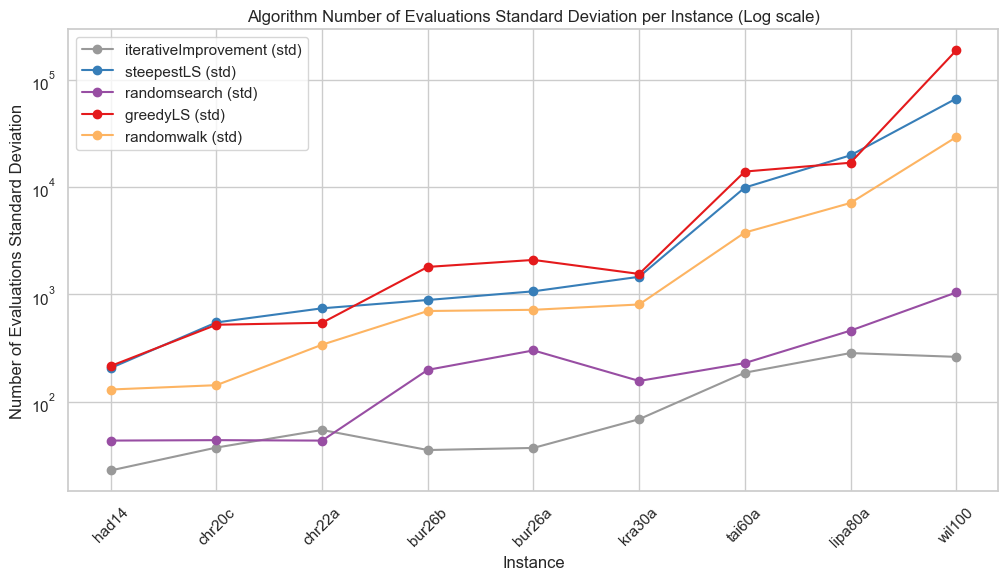

In [26]:
plot_std_line("Num_Evaluations_Log_std.pdf", summary, title="Number of Evaluations Standard Deviation", log_scale=True)

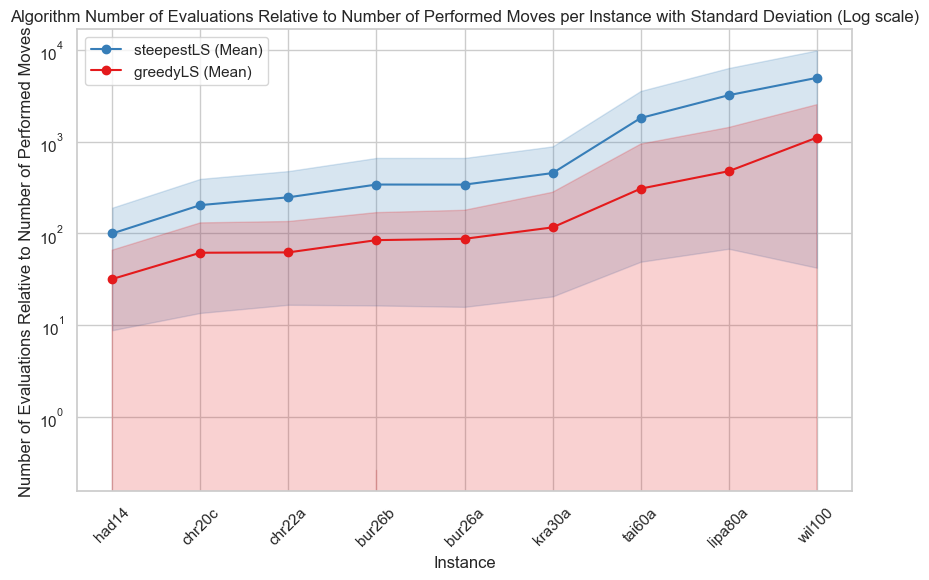

In [27]:
summary = df_performance.groupby(["Algorithm", "Instance"])[["Number_of_Evaluations", "Number_of_Performed_Moves"]].agg(["mean", "std"]).reset_index()
summary.columns = ['_'.join(col).strip('_') for col in summary.columns]

summary["Relative_Evaluations_mean"] = summary["Number_of_Evaluations_mean"] / summary["Number_of_Performed_Moves_mean"]
summary["Relative_Evaluations_std"] = summary["Number_of_Evaluations_std"] / summary["Number_of_Performed_Moves_std"]

summary = summary[["Algorithm", "Instance", "Relative_Evaluations_mean", "Relative_Evaluations_std"]]
summary = summary.rename(columns={"Relative_Evaluations_mean": "mean", "Relative_Evaluations_std": "std"})

summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
summary = summary.sort_values("Instance")

summary = summary[summary["Algorithm"].str.contains("LS")]

plot_algorithms("Relative_Performed_Moves.pdf", summary, "Number of Evaluations Relative to Number of Performed Moves", log_scale=True)

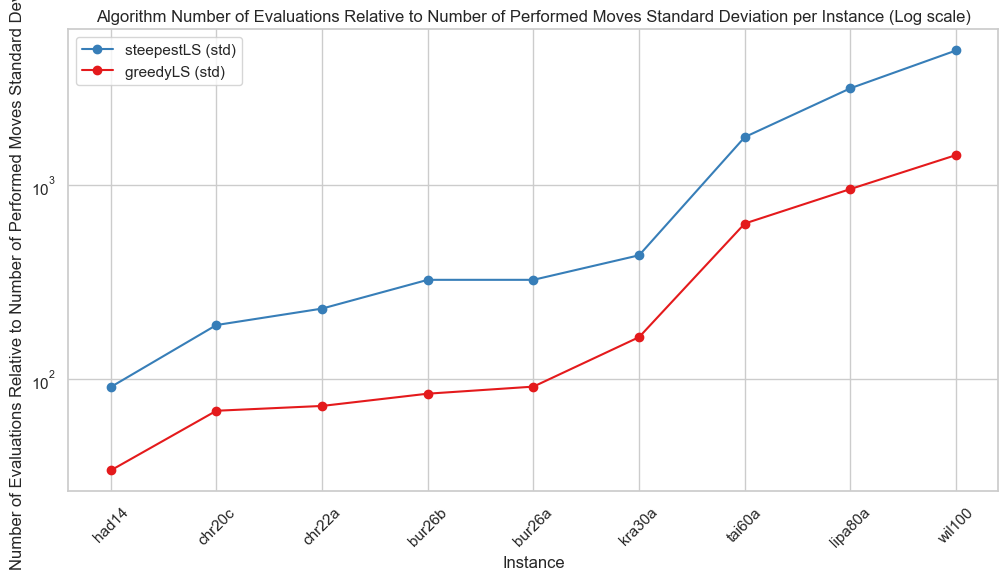

In [28]:
plot_std_line("Relative_Number_Performed_Moves_2.pdf", summary, title="Number of Evaluations Relative to Number of Performed Moves Standard Deviation", log_scale=True)

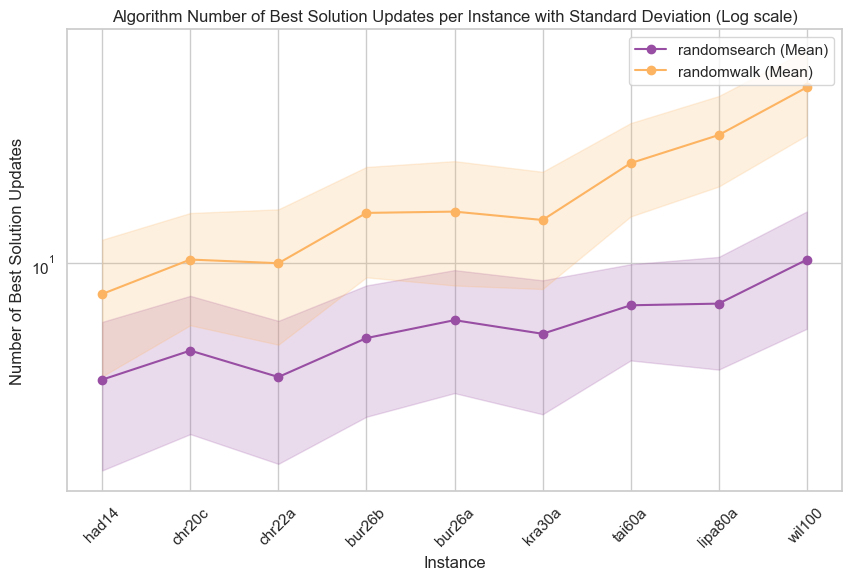

In [29]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Number_of_Best_Solution_Updates"].agg(["mean", "std"]).reset_index()

summary["Instance"] = pd.Categorical(summary["Instance"], categories=instance_names_ordered, ordered=True)
summary = summary.sort_values("Instance")

summary = summary[summary["Algorithm"].str.contains("random")]
plot_algorithms("Best_Solution_Updates.pdf", summary, title="Number of Best Solution Updates", log_scale=True)

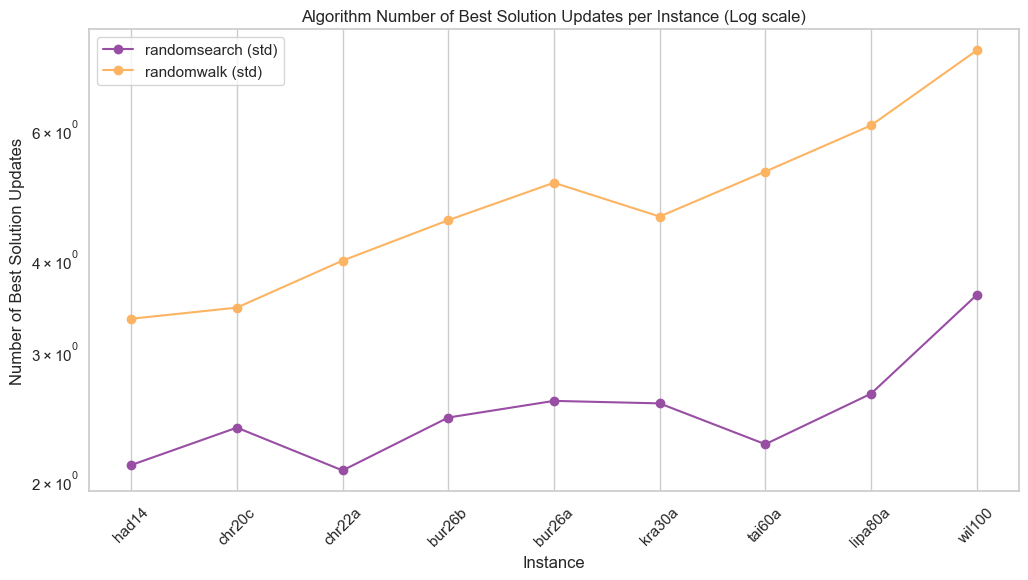

In [30]:
plot_std_line("Best_Solution_Updates_2.pdf", summary, title="Number of Best Solution Updates", log_scale=True)

## Initial Solution Comparison

In [31]:
with open(performance_file_300, 'r') as file:
    data = file.read()

df_performance_300 = parse_performance_data(data)
df_performance_300.Algorithm = df_performance_300.Algorithm.apply(lambda x: x[1:] if (x.endswith("LS") or x.endswith("Improvement")) else x)

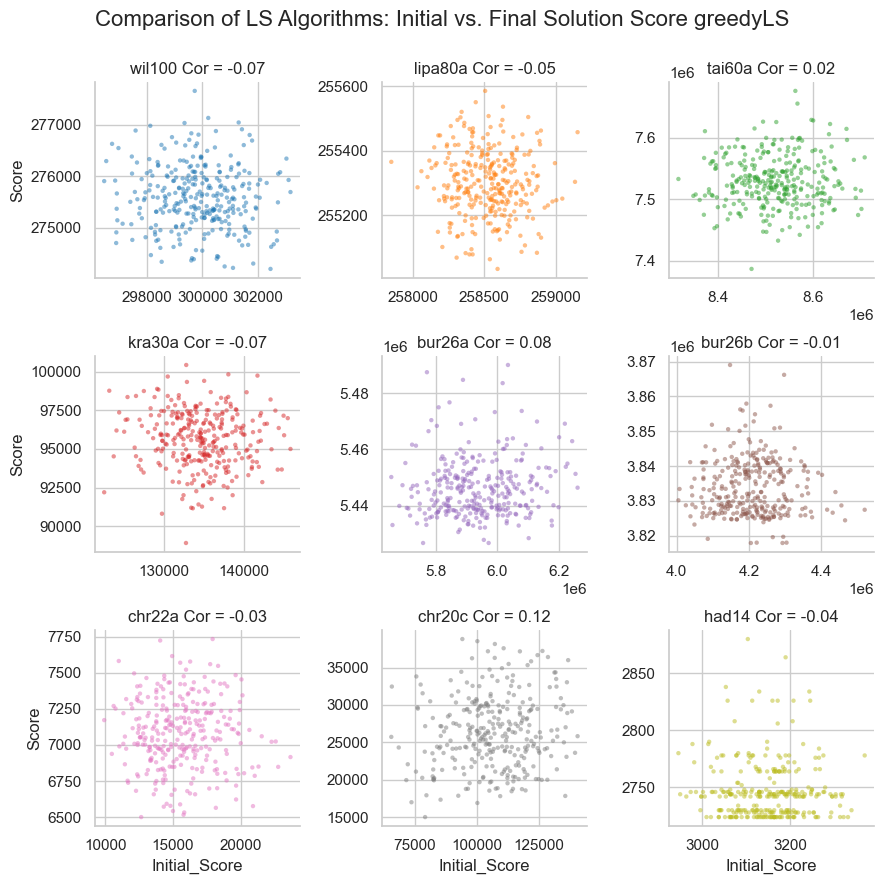

In [32]:
plot_ls_algorithms_comparison_all("initial_vs_final_greedy.pdf", df_performance_300[df_performance_300["Algorithm"].str.contains("greedyLS", case=False, na=False)], algorithm="greedyLS")

In [33]:
# plot_ls_algorithms_comparison(df_performance[df_performance["Algorithm"].str.contains("greedyLS", case=False, na=False)], algorithm="greedyLS")

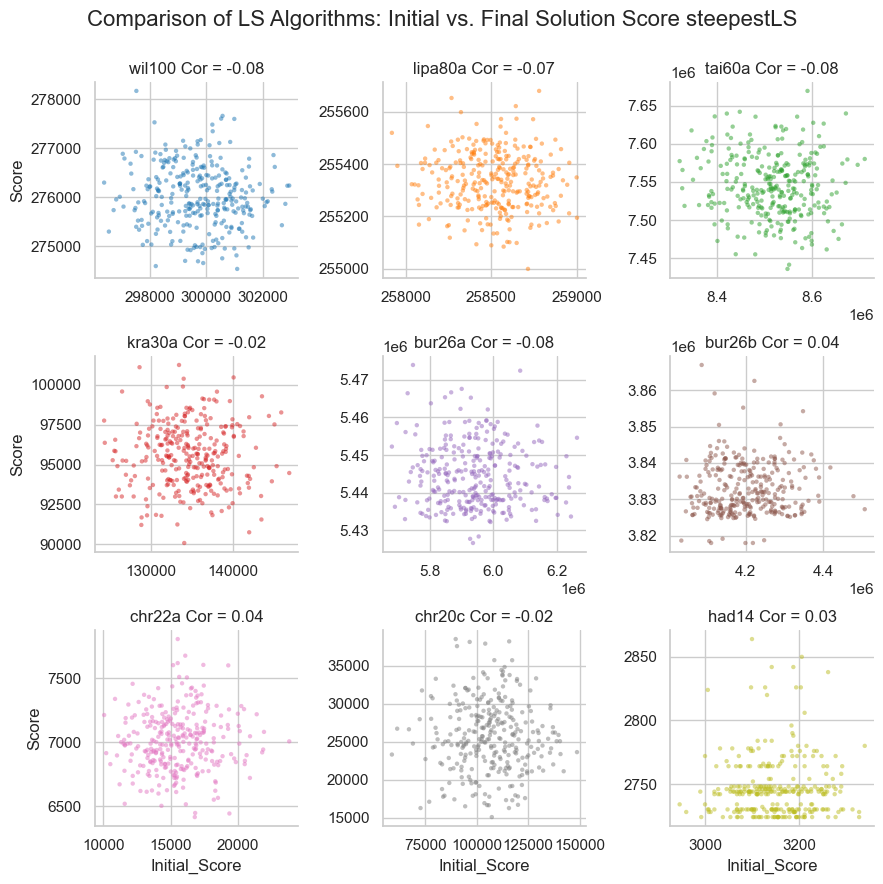

In [34]:
plot_ls_algorithms_comparison_all("initial_vs_final_steepest.pdf", df_performance_300[df_performance_300["Algorithm"].str.contains("steepestLS", case=False, na=False)], algorithm="steepestLS")

In [35]:
# plot_ls_algorithms_comparison(df_performance[df_performance["Algorithm"].str.contains("steepestLS", case=False, na=False)], "steepestLS")

## Number of Restarts Influence

Done for: ["tai60a", "kra30a", "bur26a", "bur26b", "chr22a", "chr20c", "had14"] <br>
Because of shorter runtime :)

In [36]:
dfs_msls = []
for n_restarts in num_restarts:
    restarts_file = restarts_files_path + f"{n_restarts}_msls_performance_results.txt"
    with open(restarts_file, 'r') as file:
        data = file.read()

    df_perf = parse_performance_data(data)
    df_perf.Algorithm = df_perf.Algorithm.apply(lambda x: x[1:] if (x.endswith("LS") or x.endswith("Improvement")) else x)
    df_perf = df_perf[df_perf.Algorithm != "iterativeImprovement"]
    df_perf = df_perf[["Algorithm", "Instance", "Initial_Score", "Score", "Solution", "Optimal_Score", "Optimal_Solution"]]
    df_perf["Solution_Quality"] = (df_perf["Score"] - df_perf["Optimal_Score"]) / df_perf["Optimal_Score"] * 100
    dfs_msls.append((n_restarts, df_perf))

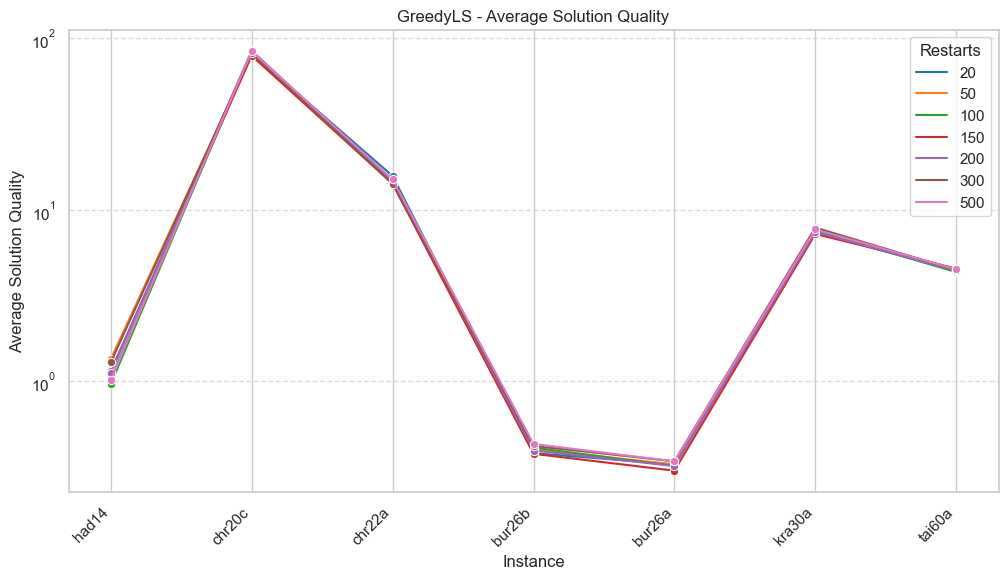

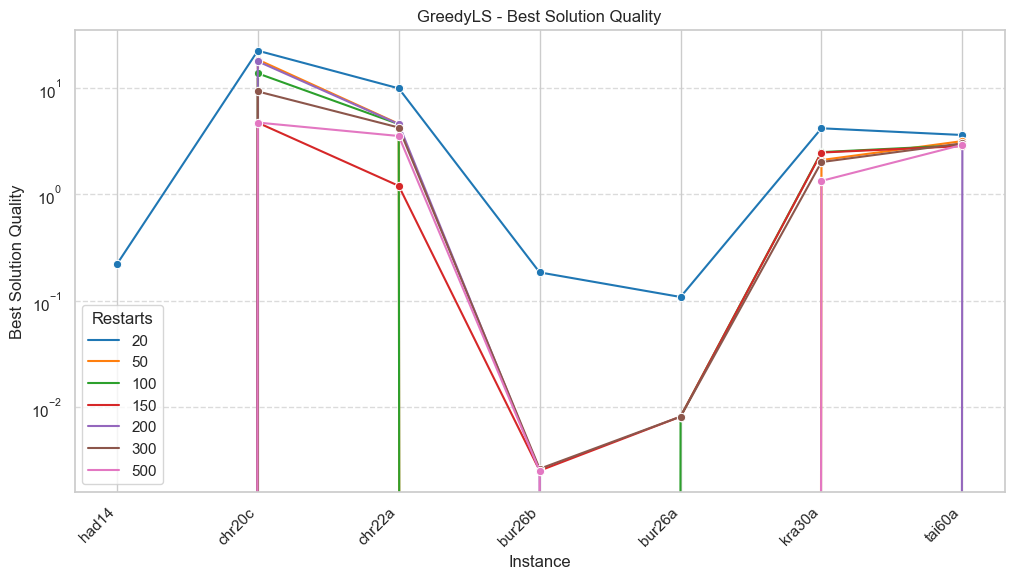

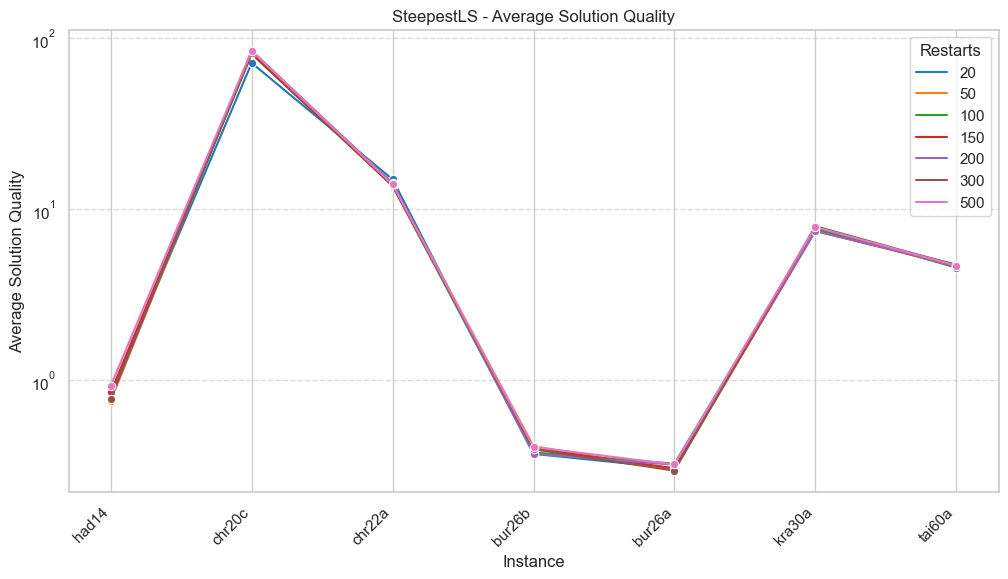

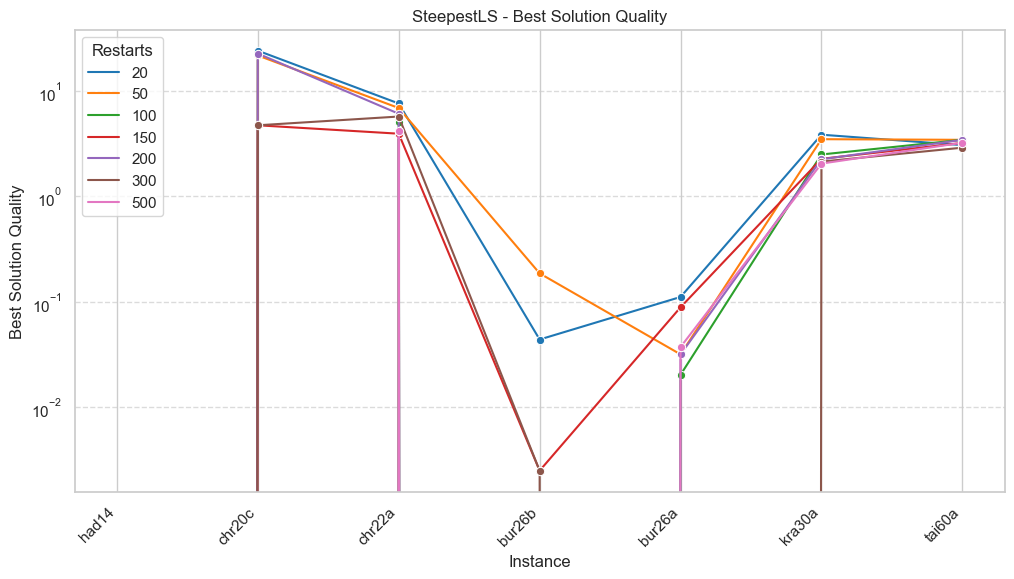

In [37]:
plot_algorithm_performance("performance_", dfs_msls)

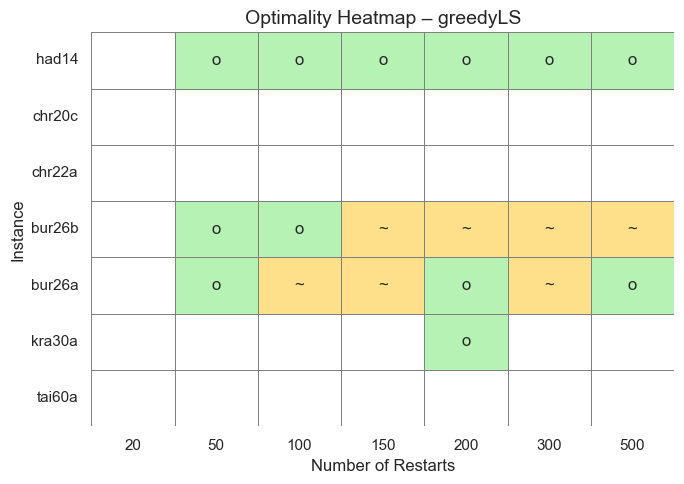

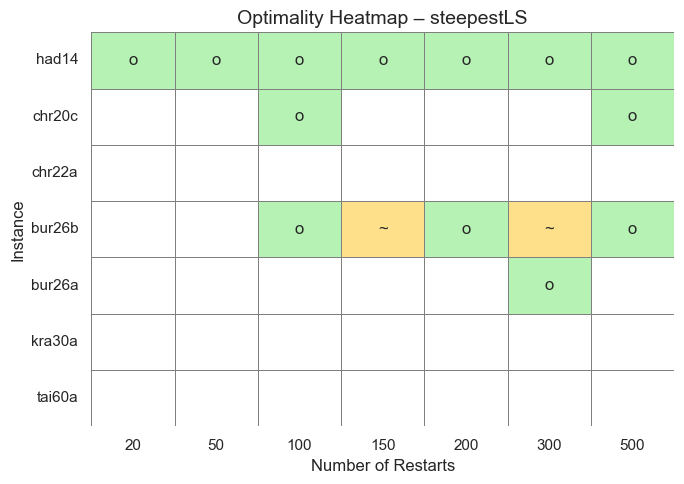

In [38]:
plot_optimality_heatmaps(dfs_msls, instance_names_ordered[:-2])

## Similarity of Locally Optimal Solutions

In [39]:
df_performance_300 = parse_performance_data(data)
df_performance_300.Algorithm = df_performance_300.Algorithm.apply(lambda x: x[1:] if (x.endswith("LS") or x.endswith("Improvement")) else x)

df_performance_300.Solution = df_performance_300.Solution.apply(lambda x: list(map(int, x.split(" ")[:-1])))
df_performance_300.Optimal_Solution = df_performance_300.Optimal_Solution.apply(lambda x: list(map(int, x.split(" ")[:-1])))
df_performance_300.tail()

,Algorithm,Instance,Initial_Score,Score,Number_of_Evaluations,Number_of_Performed_Moves,Number_of_Best_Solution_Updates,Solution,Optimal_Score,Optimal_Solution
10495,iterativeImprovement,had14,3238,2992,87,13,0,"[10, 4, 0, 13, 8, 5, 11, 12, 3, 6, 1, 2, 9, 7]",2724,"[8, 13, 10, 5, 12, 11, 2, 14, 3, 6, 7, 1, 9, 4]"
10496,iterativeImprovement,had14,3160,2848,92,13,0,"[0, 8, 4, 11, 6, 2, 5, 10, 3, 1, 13, 9, 12, 7]",2724,"[8, 13, 10, 5, 12, 11, 2, 14, 3, 6, 7, 1, 9, 4]"
10497,iterativeImprovement,had14,2940,2784,156,9,0,"[3, 8, 6, 5, 13, 10, 7, 4, 0, 11, 9, 1, 12, 2]",2724,"[8, 13, 10, 5, 12, 11, 2, 14, 3, 6, 7, 1, 9, 4]"
10498,iterativeImprovement,had14,3268,3062,93,14,0,"[12, 4, 13, 3, 5, 10, 0, 8, 7, 11, 9, 6, 1, 2]",2724,"[8, 13, 10, 5, 12, 11, 2, 14, 3, 6, 7, 1, 9, 4]"
10499,iterativeImprovement,had14,3022,2828,108,12,0,"[8, 13, 0, 5, 6, 11, 1, 10, 3, 9, 2, 4, 12, 7]",2724,"[8, 13, 10, 5, 12, 11, 2, 14, 3, 6, 7, 1, 9, 4]"


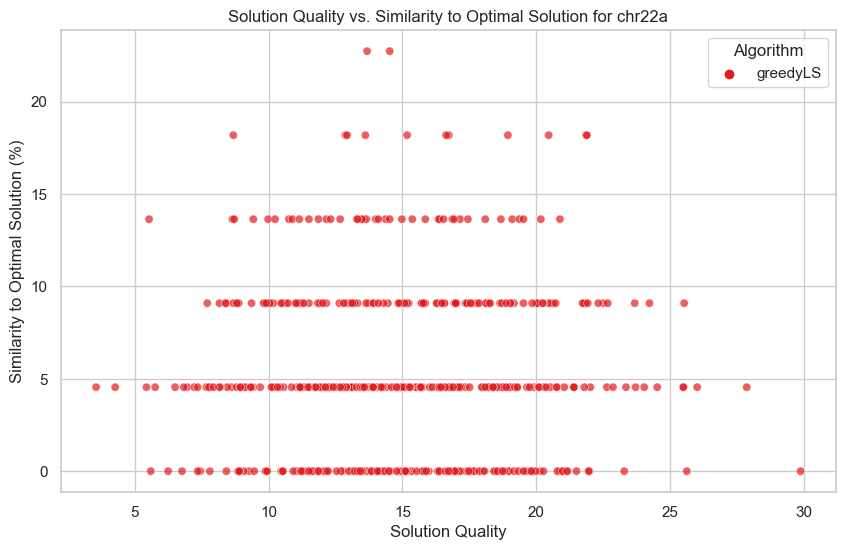

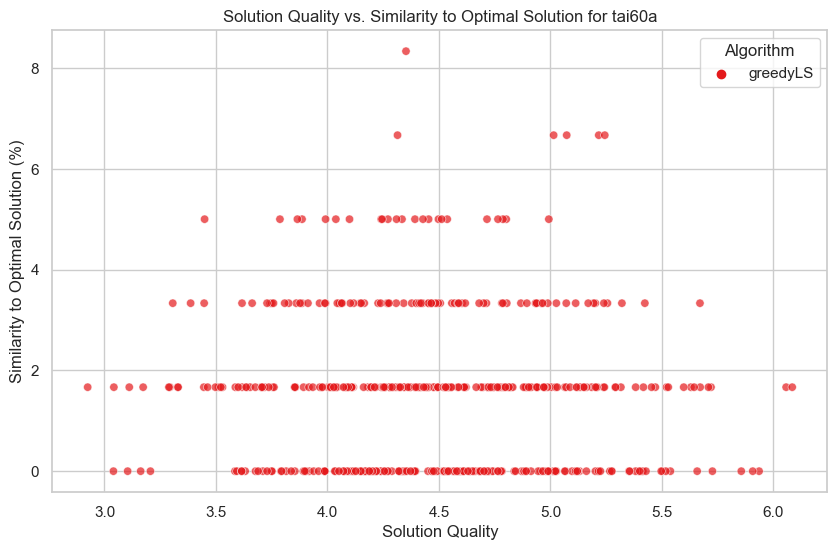

In [40]:
plot_solution_quality_vs_similarity("quality_similarity_greedy", df_performance_300[df_performance_300.Algorithm == "greedyLS"], selected_instances)

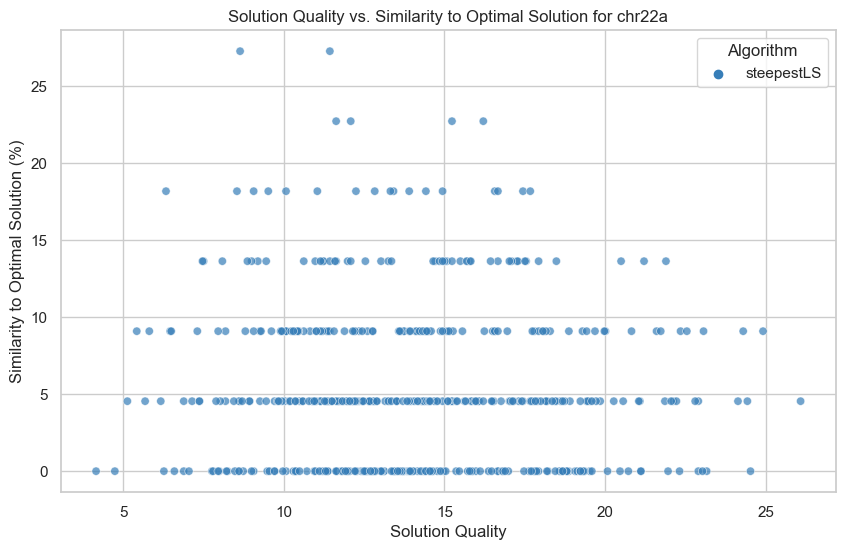

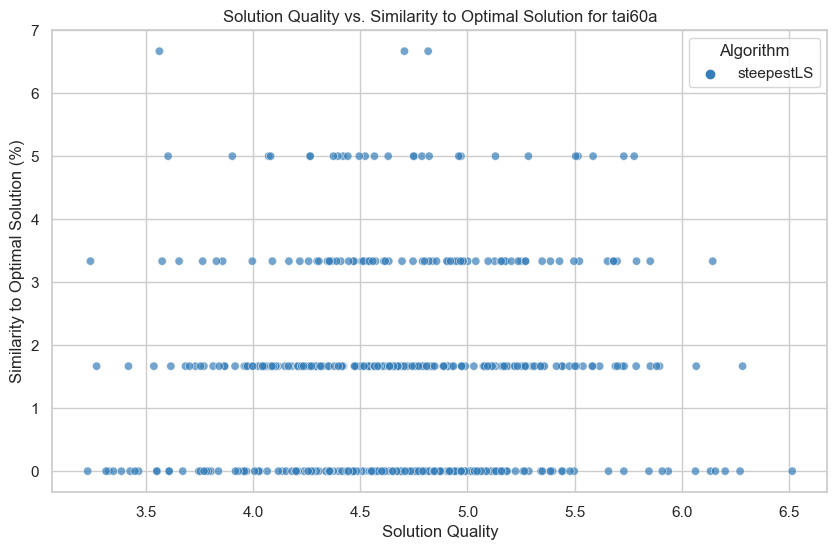

In [41]:
plot_solution_quality_vs_similarity("quality_similarity_steepest", df_performance_300[df_performance_300.Algorithm == "steepestLS"], selected_instances)